# Time Series Forecasting for CO2 Emission

In [ ]:
#Kaggle link :https://www.kaggle.com/saurav9786/time-series-tutorial/data?select=MaunaLoa.csv

In [91]:
#importing libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(18,7)

In [93]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Time Series Forecasting\\Faculty book\\Session 4\\MaunaLoa-2.csv')
df.head()#first 5 rows

,Year-Month,CO2 ppm
0,1965-Jan,319.32
1,1965-Feb,320.36
2,1965-Mar,320.82
3,1965-Apr,322.06
4,1965-May,322.17


In [94]:
df.tail()#last 5 rows

,Year-Month,CO2 ppm
187,1980-Aug,337.19
188,1980-Sep,335.49
189,1980-Oct,336.63
190,1980-Nov,337.74
191,1980-Dec,338.36


In [95]:
df.shape#192 records and 2 columns

(192, 2)

In [96]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year-Month  192 non-null    object 
 1   CO2 ppm     192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [97]:
#1 categorical colum and 1 numerical column

In [98]:
#converting into time series

In [99]:
date=pd.date_range(start='01/01/1965',periods=len(df),freq='M')
date

DatetimeIndex(['1965-01-31', '1965-02-28', '1965-03-31', '1965-04-30',
               '1965-05-31', '1965-06-30', '1965-07-31', '1965-08-31',
               '1965-09-30', '1965-10-31',
               ...
               '1980-03-31', '1980-04-30', '1980-05-31', '1980-06-30',
               '1980-07-31', '1980-08-31', '1980-09-30', '1980-10-31',
               '1980-11-30', '1980-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [100]:
df['Date']=date#adding the date column
df.set_index('Date',inplace=True)#setting the index column as date
df1=df.drop('Year-Month',axis=1)#dropping the old column
df1.head()

,CO2 ppm
Date,
1965-01-31,319.32
1965-02-28,320.36
1965-03-31,320.82
1965-04-30,322.06
1965-05-31,322.17


In [101]:
#checking for null values

In [102]:
df1.isnull().sum()

CO2 ppm    0
dtype: int64

In [103]:
#there are no null values present

In [104]:
#Simple Visulization

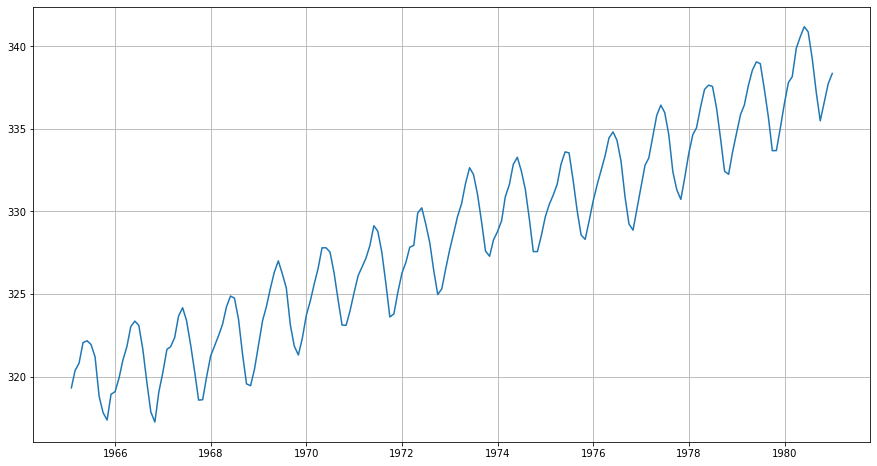

In [105]:
plt.figure(figsize=(15,8))
plt.plot(df1)
plt.grid(True)
plt.show()

In [106]:
#Inferences:

#With years in progress we can see that the CO2 ppm also increases  
#We can see that there is tred is aditive and seasonality is additive in the above data

In [107]:
#Checking or distribution of data (YEAR wise)

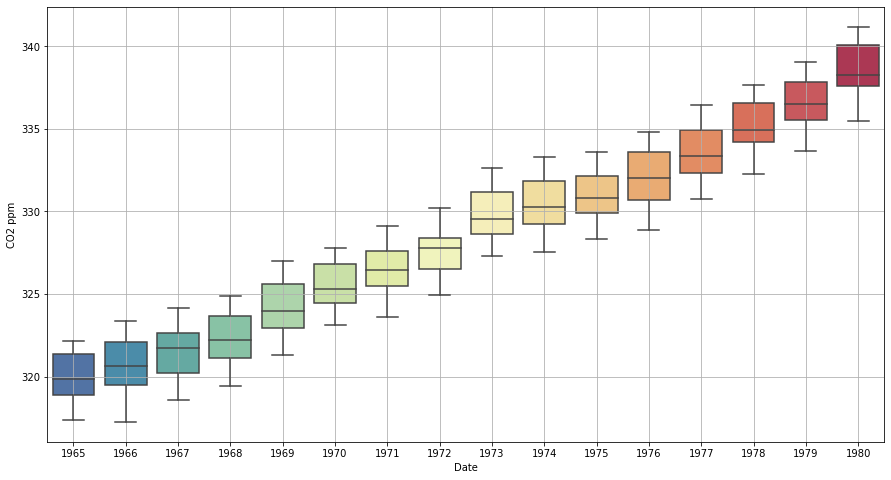

In [108]:
plt.figure(figsize=(15,8))
sns.boxplot(df1.index.year,df1['CO2 ppm'],palette='Spectral_r')
plt.grid(True)
plt.show()

In [109]:
##With years in progress we can see CO2 emmision has also increased
#(bigger the size of the box represents High variation of CO2 emmision in that year)

In [110]:
#Checking or distribution of data (Month wise)

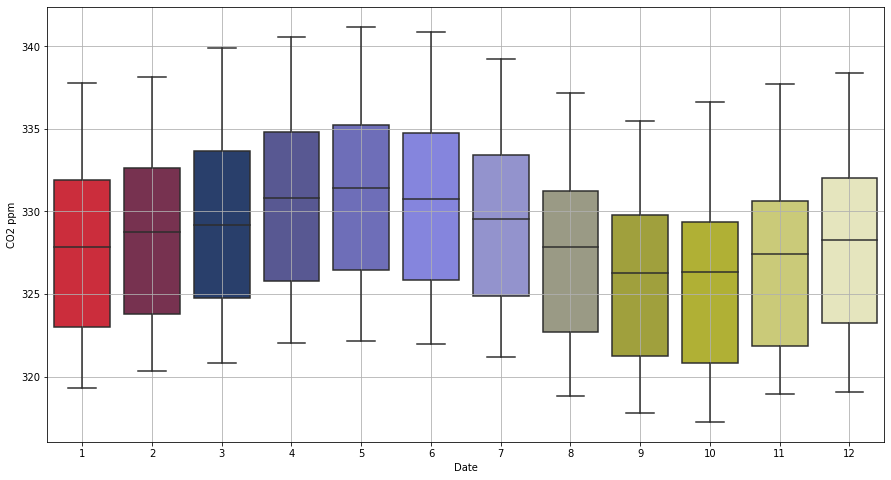

In [111]:
plt.figure(figsize=(15,8))
sns.boxplot(df1.index.month,df1['CO2 ppm'],palette='gist_stern')
plt.grid(True)
plt.show()

In [112]:
#High variation in data can be observed in the month of April, may and june

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose

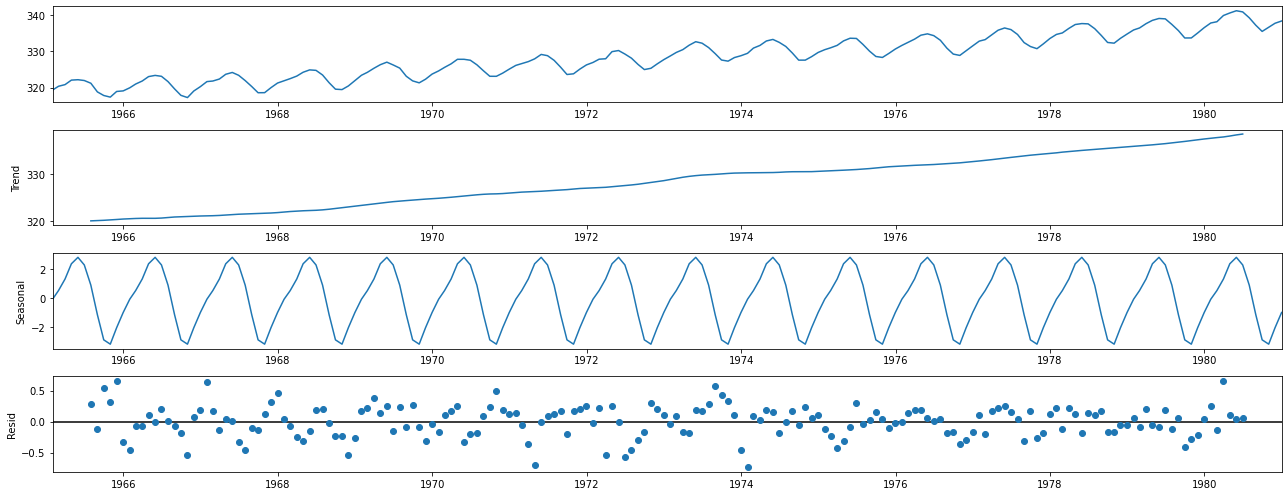

In [114]:
#plt.figure(figsize=(15,8))
decomposition=seasonal_decompose(df1,model='additive')
decomposition.plot();

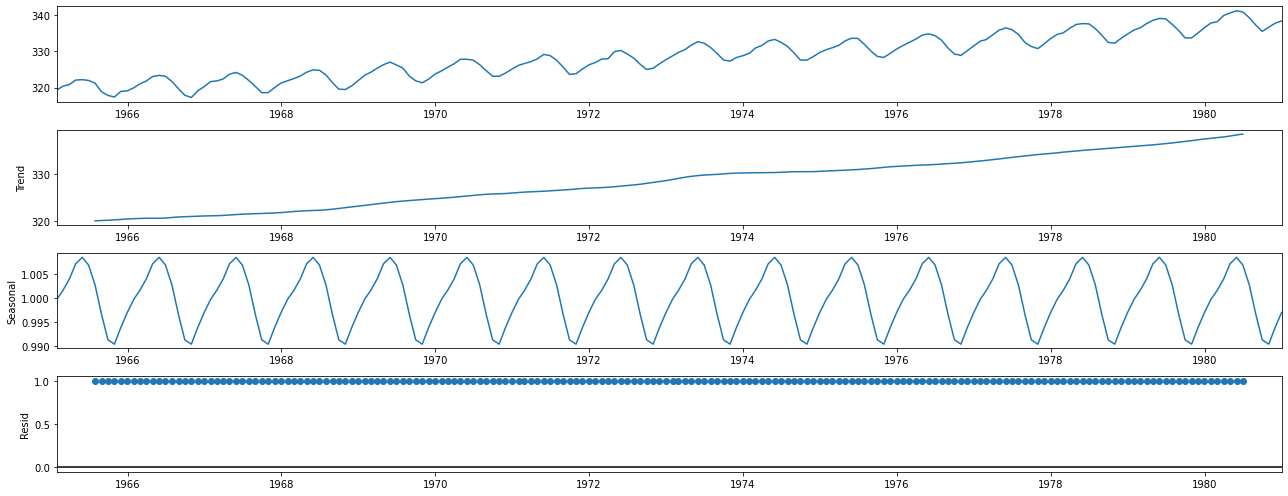

In [115]:
#plt.figure(figsize=(15,8))
decomposition=seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

In [116]:
#additive:
#Trend is additive and Seasonality is also additive in nature.
#In additive model all the residuals are scattered

#Multilicative
#Even from multiplicative we can see that Trend is additive and Seasonality is additive in nature
#In Multiplicative model all the residuals lie areound the range of 1

#Since the seasonality does not change with Trend with respect to both Additive and Multiplicative,
#also the residuals lie around the range of 1, multiplicative us the best method

In [117]:
#checking for stationary and non-stationary data

In [118]:
from statsmodels.tsa.stattools import adfuller

In [119]:
observations=df1.values
test_result1=adfuller(observations)
#test_result

In [120]:
print('ADF stastic : ',test_result1[0])#test statistic
print('pvalue  : ',test_result1[1])
print('Critical Values:')
for key,value in test_result1[4].items():#Critical values for the test statistic at the 1 %, 5 %, and 10 %
    print(key,value)

ADF stastic :  1.2696771490032233
pvalue  :  0.9964336403294772
Critical Values:
1% -3.4674201432469816
5% -2.877826051844538
10% -2.575452082332012


In [121]:
#As pvalue is grater than 0.05 thus Test result confirms that series is non-stationary

In [122]:
#Checking for non-stationarity by plotting

In [123]:
df1.head()

,CO2 ppm
Date,
1965-01-31,319.32
1965-02-28,320.36
1965-03-31,320.82
1965-04-30,322.06
1965-05-31,322.17


In [124]:
monthly_mean=df1.groupby(df1.index.month)['CO2 ppm'].agg('mean')
monthly_mean

Date
1     327.829375
2     328.546875
3     329.415000
4     330.569375
5     331.090625
6     330.686875
7     329.400625
8     327.459375
9     325.830625
10    325.721875
11    326.949375
12    328.067500
Name: CO2 ppm, dtype: float64

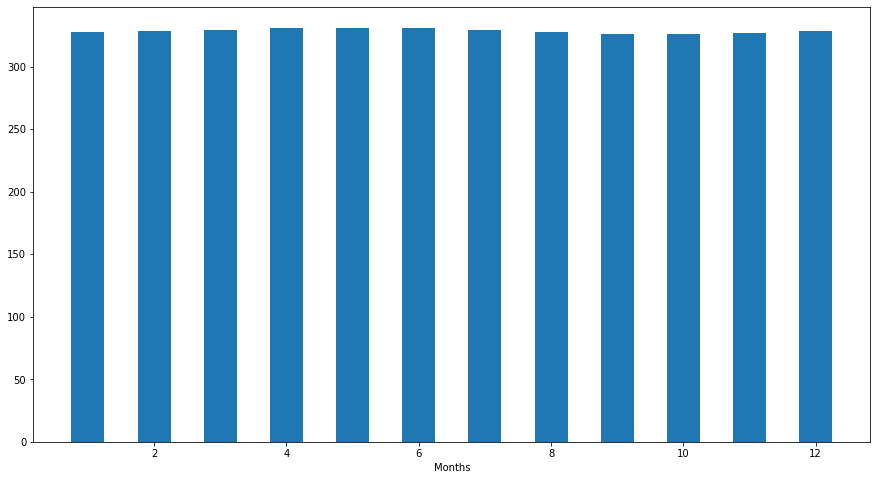

In [125]:
plt.figure(figsize=(15,8))
plt.bar(monthly_mean.index,monthly_mean,width=0.5)
plt.xlabel('Months')
plt.show()

In [126]:
#There is less Variation in monthly mean plot is indicating that series is non-stationary

In [127]:
#lets plot rolling mean and std deviation

In [128]:
rolling_mean=df1.rolling(window=15).mean()
rolling_std=df1.rolling(window=15).std()

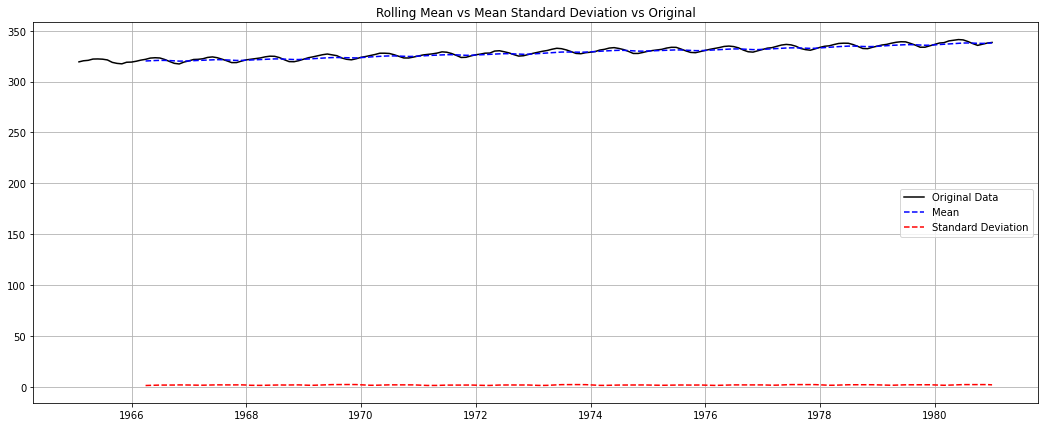

In [129]:
original=plt.plot(df1,'black',label='Original Data')
mean=plt.plot(rolling_mean,'b--',label='Mean')
std=plt.plot(rolling_std,'r--',label='Standard Deviation')
plt.legend()
plt.title('Rolling Mean vs Mean Standard Deviation vs Original')
plt.grid(True)
plt.show()

In [130]:
#Both rolling mean and std deviation are changing a little over a period of time

In [131]:
#Check the Auto Correlation funtion and Partial Auto Correlation funtion of the training data.

In [132]:
from statsmodels.graphics.tsaplots import  plot_pacf
from statsmodels.graphics.tsaplots import  plot_acf

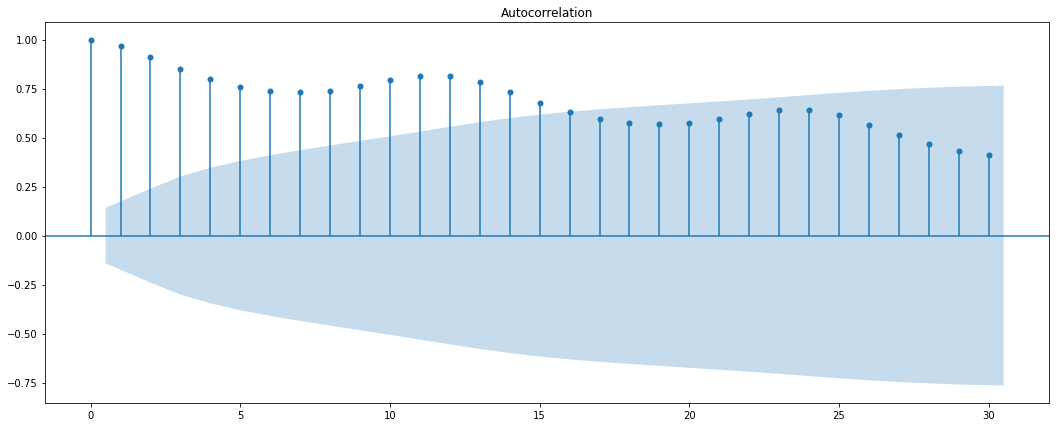

In [133]:
plot_acf(df1,lags=30);

In [134]:
#Inferences:
#q=0 because its decaying
#ACF plot is showing gradual decay

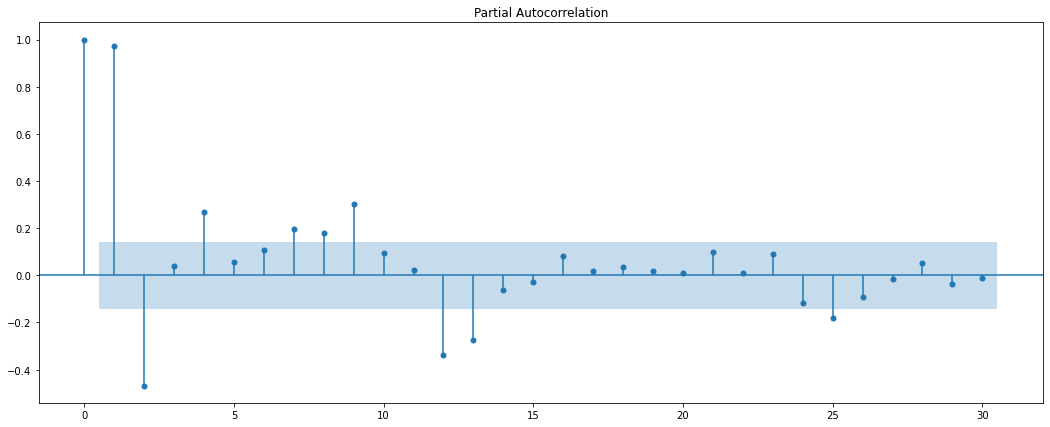

In [135]:
plot_pacf(df1,lags=30);

In [136]:
#Inferences:
#whereas PACF plot cut-offs after forst two lags.

In [137]:
#What other actions will you take if series is non-stationary?

In [138]:
df_diff=df1.diff(periods=1).dropna()
observations= df_diff.values
test_result2 = adfuller(observations)
#test_result2

In [139]:
print('ADF stastic : ',test_result2[0])#test statistic
print('pvalue  : ',test_result2[1])
print('Critical Values:')
for key,value in test_result2[4].items():#Critical values for the test statistic at the 1 %, 5 %, and 10 %
    print(key,value)

ADF stastic :  -4.750106971676813
pvalue  :  6.768699865174985e-05
Critical Values:
1% -3.4674201432469816
5% -2.877826051844538
10% -2.575452082332012


In [140]:
#-------------------------------------------------------END---------------------------------------------------#

In [141]:
#Modelling

In [177]:
#Performing Train Test Split (Test for last 12 months)

In [178]:
df1.head()

,CO2 ppm
Date,
1965-01-31,319.32
1965-02-28,320.36
1965-03-31,320.82
1965-04-30,322.06
1965-05-31,322.17


In [179]:
from sklearn.model_selection import train_test_split

In [180]:
Train,Test=train_test_split(df1,test_size=0.06,shuffle=False)

In [181]:
Train.head()

,CO2 ppm
Date,
1965-01-31,319.32
1965-02-28,320.36
1965-03-31,320.82
1965-04-30,322.06
1965-05-31,322.17


In [182]:
Train.tail()

,CO2 ppm
Date,
1979-08-31,335.71
1979-09-30,333.68
1979-10-31,333.69
1979-11-30,335.05
1979-12-31,336.53


In [183]:
Train.shape

(180, 1)

In [184]:
Test.shape

(12, 1)

In [185]:
#ARIMA (AutoRegressive Integrated Moving Average)

In [186]:
import itertools

In [187]:
p=q=range(0,3)
d=range(0,3)
pdq=list(itertools.product(p,d,q))
#pdq

In [188]:
ARIMA_df=pd.DataFrame(columns=['param','AIC'])
ARIMA_df

,param,AIC


In [189]:
from statsmodels.tsa.arima_model import ARIMA

In [190]:
for param in pdq:
    try:
        ARIMA_model=ARIMA(Train,order=param)
        Result_ARIMA=ARIMA_model.fit()
        print('ARIMA',param,'AIC',Result_ARIMA.aic)
        ARIMA_df=ARIMA_df.append({'param':param,'AIC':Result_ARIMA.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 0, 0) AIC 1128.4282827681723
ARIMA (0, 0, 1) AIC 900.1741080458129
ARIMA (0, 1, 0) AIC 561.0986607523141
ARIMA (0, 1, 1) AIC 459.27497642438664
ARIMA (0, 1, 2) AIC 414.6037330029369
ARIMA (0, 2, 0) AIC 467.4591673773914
ARIMA (0, 2, 1) AIC 458.56029567233816
ARIMA (0, 2, 2) AIC 454.3313229741982
ARIMA (1, 0, 0) AIC 569.8654325601435
ARIMA (1, 0, 1) AIC 467.080369090941
ARIMA (1, 0, 2) AIC 420.620922267304
ARIMA (1, 1, 0) AIC 443.60664444640906
ARIMA (1, 1, 1) AIC 423.8356697665907
ARIMA (1, 2, 0) AIC 457.66235074000247
ARIMA (2, 0, 0) AIC 443.4687596064986
ARIMA (2, 0, 1) AIC 426.1527419351414
ARIMA (2, 0, 2) AIC 408.73293389978863
ARIMA (2, 1, 0) AIC 400.3350134642854
ARIMA (2, 1, 2) AIC 327.7012324486959
ARIMA (2, 2, 0) AIC 459.08063426452793


In [191]:
ARIMA_df.sort_values('AIC')

,param,AIC
18,"(2, 1, 2)",327.701232
17,"(2, 1, 0)",400.335013
16,"(2, 0, 2)",408.732934
4,"(0, 1, 2)",414.603733
10,"(1, 0, 2)",420.620922
12,"(1, 1, 1)",423.835670
15,"(2, 0, 1)",426.152742
14,"(2, 0, 0)",443.468760
11,"(1, 1, 0)",443.606644
7,"(0, 2, 2)",454.331323


In [192]:
ARIMA_model=ARIMA(Train,order=(2, 1, 2))
ARIMA_model_fit=ARIMA_model.fit()

In [232]:
ARIMA_model_pred=ARIMA_model_fit.forecast(steps=len(Test))[0]
ARIMA_model_pred

array([337.90652313, 338.8002514 , 339.03754458, 338.66250584,
       337.89567604, 337.04559118, 336.40561316, 336.16862933,
       336.38268179, 336.95542648, 337.69977508, 338.40181155])

In [233]:
from sklearn.metrics import mean_squared_error

In [234]:
#Calcualte RMSE
rmse1=mean_squared_error(Test['CO2 ppm'],ARIMA_model_pred,squared=False)
print('The RMSE for the ARIMA model is:',rmse1)

The RMSE for the ARIMA model is: 1.8322586426149936


In [235]:
def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [236]:
#Calcualte RMSE
mape1=MAPE(Test['CO2 ppm'],ARIMA_model_pred)
print('The MAPE for the ARIMA model is:',mape1)

The MAPE for the ARIMA model is: 0.38681011205701243


In [237]:
#MPAE less than or equal to 10% is considered to be execellent
#MPAE less than or equal to 20% is considered to be good

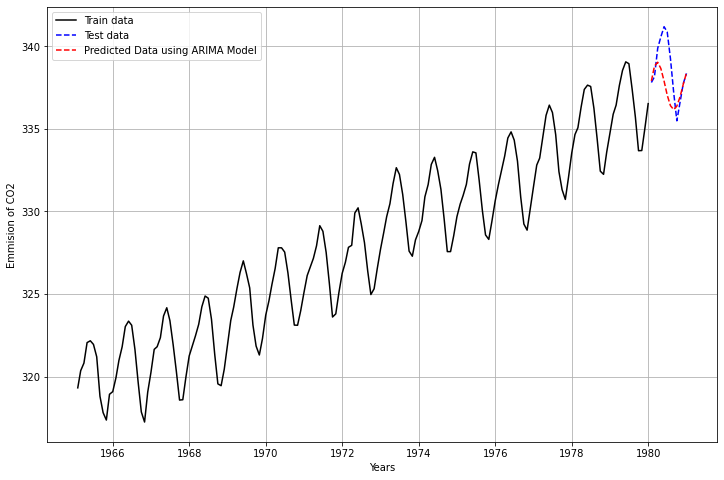

In [249]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'black',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.plot(Test.index,ARIMA_model_pred,'r--',label='Predicted Data using ARIMA Model')
plt.xlabel('Years')
plt.ylabel('Emmision of CO2')
plt.legend()
plt.grid(True)
plt.show()

In [250]:
from statsmodels.graphics.gofplots import qqplot

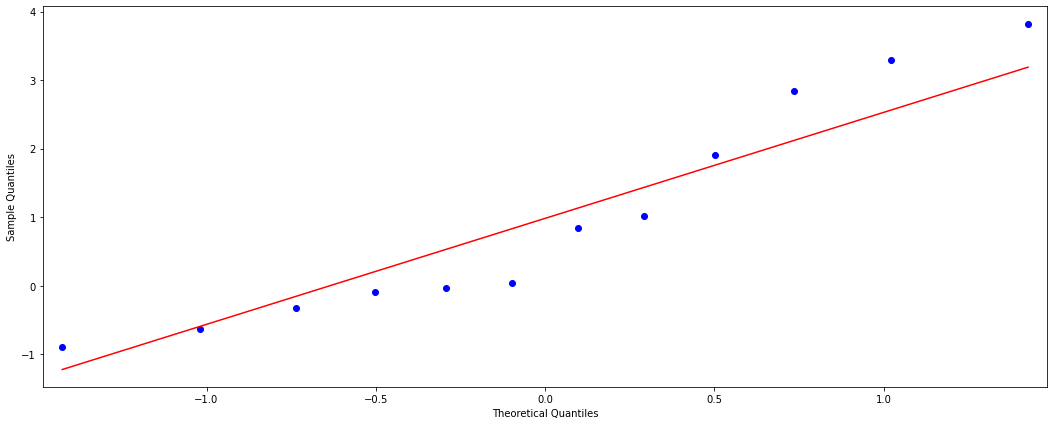

In [251]:
residuals_ARIMA = Test['CO2 ppm']-ARIMA_model_pred
qqplot(residuals_ARIMA,line='s')
plt.show()

In [241]:
#As most of the obseravtion are liitle away form the line we can say the model is little better
#There is one outlier which can been seen

<Figure size 864x576 with 0 Axes>

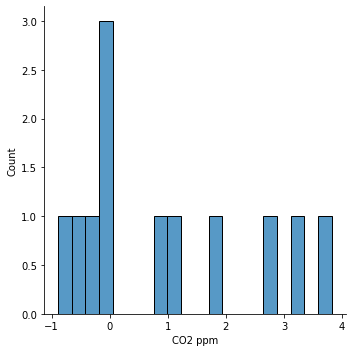

In [242]:
plt.figure(figsize=(12,8))
sns.displot(residuals_ARIMA,bins=20)
plt.show()

In [243]:
#SARIMA (seasonal autoregressive integrated moving average)

In [244]:
#Now to include seasonality, we will use SARIMA model

In [245]:
#we will find the model parameters based on AIC criteria. 
#Parameters will be generated using combination for the given range.

In [246]:
p=q=range(0,3)
d=range(0,3)
pdq=list(itertools.product(p,d,q))
#pdq

In [247]:
model_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
#model_pdq

In [248]:
SARIMA_df=pd.DataFrame(columns=['param','seasonal','AIC'])
SARIMA_df

,param,seasonal,AIC


In [217]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [218]:
for param in pdq:
    for param_seasonal in model_pdq:
        Model_SARIMA=sm.tsa.statespace.SARIMAX(Train,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
    enforce_invertibility=False)
        Result_SARIMA=Model_SARIMA.fit()
        print('SARIMA',param,param_seasonal,'AIC','-',Result_SARIMA.aic)
        SARIMA_df=SARIMA_df.append({'param':param,'seasonal':param_seasonal,'AIC':Result_SARIMA.aic},ignore_index=True)

SARIMA (0, 0, 0) (0, 0, 0, 12) AIC - 2583.7496393514343
SARIMA (0, 0, 0) (0, 0, 1, 12) AIC - 2223.9245961305896
SARIMA (0, 0, 0) (0, 0, 2, 12) AIC - 1915.1117915536738
SARIMA (0, 0, 0) (0, 1, 0, 12) AIC - 571.9900809477913
SARIMA (0, 0, 0) (0, 1, 1, 12) AIC - 477.92541200151896
SARIMA (0, 0, 0) (0, 1, 2, 12) AIC - 416.17490162339664
SARIMA (0, 0, 0) (0, 2, 0, 12) AIC - 427.1555067151496
SARIMA (0, 0, 0) (0, 2, 1, 12) AIC - 305.2464383539758
SARIMA (0, 0, 0) (0, 2, 2, 12) AIC - 274.5918146502388
SARIMA (0, 0, 0) (1, 0, 0, 12) AIC - 312.72168764610626
SARIMA (0, 0, 0) (1, 0, 1, 12) AIC - 295.95624784305846
SARIMA (0, 0, 0) (1, 0, 2, 12) AIC - 243.6631645237314
SARIMA (0, 0, 0) (1, 1, 0, 12) AIC - 415.03966369229727
SARIMA (0, 0, 0) (1, 1, 1, 12) AIC - 330.3326451973156
SARIMA (0, 0, 0) (1, 1, 2, 12) AIC - 296.7706662498948
SARIMA (0, 0, 0) (1, 2, 0, 12) AIC - 360.8845394124254
SARIMA (0, 0, 0) (1, 2, 1, 12) AIC - 300.9990794043432
SARIMA (0, 0, 0) (1, 2, 2, 12) AIC - 281.6017427029759
SA

In [220]:
SARIMA_df.sort_values('AIC')

,param,seasonal,AIC
329,"(1, 1, 0)","(0, 1, 2, 12)",58.998018
338,"(1, 1, 0)","(1, 1, 2, 12)",59.916810
130,"(0, 1, 1)","(2, 1, 1, 12)",59.934606
491,"(2, 0, 0)","(0, 1, 2, 12)",60.674942
572,"(2, 1, 0)","(0, 1, 2, 12)",60.903074
...,...,...,...
55,"(0, 0, 2)","(0, 0, 1, 12)",2038.106289
54,"(0, 0, 2)","(0, 0, 0, 12)",2085.065563
1,"(0, 0, 0)","(0, 0, 1, 12)",2223.924596
27,"(0, 0, 1)","(0, 0, 0, 12)",2330.703761


In [221]:
model_SARIMA=sm.tsa.statespace.SARIMAX(Train,seasonal_order=(0, 1, 2, 12),order=(1,1,0),enforce_stationarity=False,enforce_invertibility=False)
model_SARIMA_fit=model_SARIMA.fit()

In [222]:
SARIMA_model_pred=model_SARIMA_fit.forecast(steps=len(Test))
SARIMA_model_pred

1980-01-31    337.469036
1980-02-29    338.204280
1980-03-31    339.035952
1980-04-30    340.219232
1980-05-31    340.762743
1980-06-30    340.338715
1980-07-31    339.038926
1980-08-31    337.137488
1980-09-30    335.469587
1980-10-31    335.295437
1980-11-30    336.506873
1980-12-31    337.728054
Freq: M, Name: predicted_mean, dtype: float64

In [223]:
#Calcualte RMSE
rmse2=mean_squared_error(Test['CO2 ppm'],SARIMA_model_pred,squared=False)
print('The RMSE for the SARIMA model is:',rmse2)

The RMSE for the SARIMA model is: 0.6562030302729479


In [224]:
#Calcualte RMSE
mape2=MAPE(Test['CO2 ppm'],SARIMA_model_pred)
print('The MAPE for the SARIMA model is:',mape2)

The MAPE for the SARIMA model is: 0.14822075274570348


In [225]:
#MPAE less than or equal to 10% is considered to be execellent
#MPAE less than or equal to 20% is considered to be good

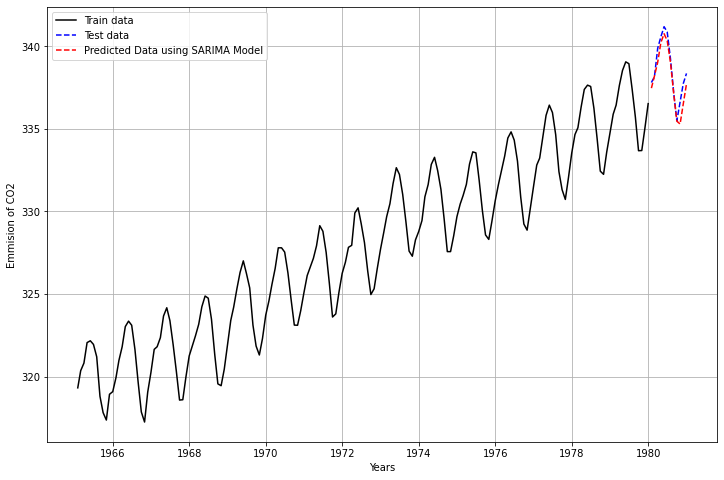

In [252]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'black',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.plot(Test.index,SARIMA_model_pred,'r--',label='Predicted Data using SARIMA Model')
plt.xlabel('Years')
plt.ylabel('Emmision of CO2')
plt.legend()
plt.grid(True)
plt.show()

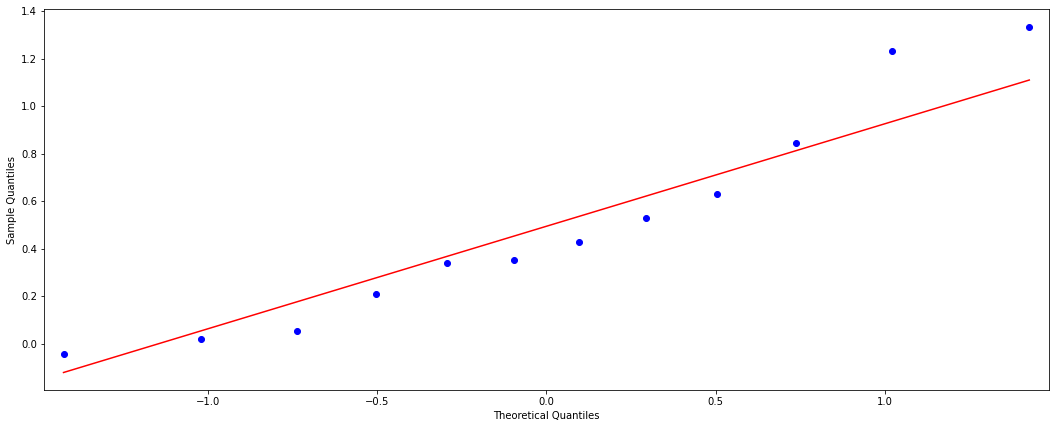

In [227]:
residuals_ARIMA = Test['CO2 ppm']-SARIMA_model_pred
qqplot(residuals_ARIMA,line='s')
plt.show()

In [228]:
#As most of the obseravtion are liitle away form the line we can say the model is little better
#There is one outlier which can been seen

<Figure size 864x576 with 0 Axes>

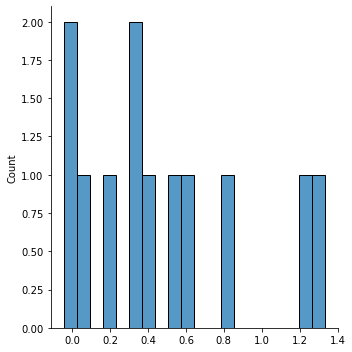

In [229]:
plt.figure(figsize=(12,8))
sns.displot(residuals_ARIMA,bins=20)
plt.show()

In [ ]:
#-----------------------------------------END-------------------------------------------------------------------------------#